In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv


In [2]:
data_penguins = pd.read_csv('../input/palmer-penguins-datasetalternative-iris-dataset/penguins.csv')

In [3]:
data_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female


In [4]:
data_penguins.tail()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male
343,Chinstrap,Dream,50.2,18.7,198.0,3775.0,female


In [5]:
data_penguins.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


## Measuring central tendency

In [6]:
print(data_penguins.mean(numeric_only=True))

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64


In [7]:
print(data_penguins.median(numeric_only=True))

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64


## Measuring variance and range

In [8]:
print(data_penguins.std())

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
print(data_penguins.max(numeric_only=True)-data_penguins.min(numeric_only=True))

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


## Working with percentiles

In [10]:
print(data_penguins.quantile([0,.25,.50,.75,1]))

      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0.00          32.100           13.1              172.0       2700.0
0.25          39.225           15.6              190.0       3550.0
0.50          44.450           17.3              197.0       4050.0
0.75          48.500           18.7              213.0       4750.0
1.00          59.600           21.5              231.0       6300.0


### Skewness

In [11]:
from scipy.stats import skew, skewtest
variable = data_penguins['bill_length_mm']
s = skew(variable)
zscore, pvalue = skewtest(variable)
print('Skewness %0.3f z-score %0.3f p-value %0.3f'
% (s, zscore, pvalue))

Skewness nan z-score nan p-value nan


### Kurtosis

In [12]:
from scipy.stats import kurtosis, kurtosistest
variable = data_penguins['bill_length_mm']
k = kurtosis(variable)
zscore, pvalue = kurtosistest(variable)
print('Kurtosis %0.3f z-score %0.3f p-value %0.3f'
% (k, zscore, pvalue))

Kurtosis nan z-score nan p-value nan


# Counting for Categorical Data

In [13]:
pcts = [0, .25, .5, .75, 1]
penguins_binned = pd.concat(
[pd.qcut(data_penguins.iloc[:,2], pcts, precision=1),
pd.qcut(data_penguins.iloc[:,3], pcts, precision=1),
pd.qcut(data_penguins.iloc[:,4], pcts, precision=1),
pd.qcut(data_penguins.iloc[:,5], pcts, precision=1)],
join='outer', axis = 1)

In [14]:
data_penguins.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [15]:
penguins_binned

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,"(32.0, 39.2]","(17.3, 18.7]","(171.9, 190.0]","(3550.0, 4050.0]"
1,"(39.2, 44.4]","(17.3, 18.7]","(171.9, 190.0]","(3550.0, 4050.0]"
2,"(39.2, 44.4]","(17.3, 18.7]","(190.0, 197.0]","(2699.9, 3550.0]"
3,NaN,NaN,NaN,NaN
4,"(32.0, 39.2]","(18.7, 21.5]","(190.0, 197.0]","(2699.9, 3550.0]"
...,...,...,...,...
339,"(48.5, 59.6]","(18.7, 21.5]","(197.0, 213.0]","(3550.0, 4050.0]"
340,"(39.2, 44.4]","(17.3, 18.7]","(197.0, 213.0]","(2699.9, 3550.0]"
341,"(48.5, 59.6]","(17.3, 18.7]","(190.0, 197.0]","(3550.0, 4050.0]"
342,"(48.5, 59.6]","(18.7, 21.5]","(197.0, 213.0]","(4050.0, 4750.0]"


In [16]:
penguins_binned.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,"(32.0, 39.2]","(17.3, 18.7]","(171.9, 190.0]","(3550.0, 4050.0]"
1,"(39.2, 44.4]","(17.3, 18.7]","(171.9, 190.0]","(3550.0, 4050.0]"
2,"(39.2, 44.4]","(17.3, 18.7]","(190.0, 197.0]","(2699.9, 3550.0]"
3,NaN,NaN,NaN,NaN
4,"(32.0, 39.2]","(18.7, 21.5]","(190.0, 197.0]","(2699.9, 3550.0]"


## Counting frequencies

In [17]:
print(data_penguins['species'].value_counts())

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64


In [18]:
print(penguins_binned['bill_length_mm'].value_counts())

(44.4, 48.5]    87
(32.0, 39.2]    86
(39.2, 44.4]    85
(48.5, 59.6]    84
Name: bill_length_mm, dtype: int64


In [19]:
print(penguins_binned.describe())

       bill_length_mm bill_depth_mm flipper_length_mm       body_mass_g
count             342           342               342               342
unique              4             4                 4                 4
top      (44.4, 48.5]  (13.0, 15.6]    (171.9, 190.0]  (2699.9, 3550.0]
freq               87            88                99                89


## Creating contingency tables

In [20]:
print(pd.crosstab(data_penguins['species'],penguins_binned['bill_length_mm']))

bill_length_mm  (32.0, 39.2]  (39.2, 44.4]  (44.4, 48.5]  (48.5, 59.6]
species                                                               
Adelie                    86            62             3             0
Chinstrap                  0             6            23            39
Gentoo                     0            17            61            45


# Creating Applied Visualization for EDA
## Inspecting boxplots

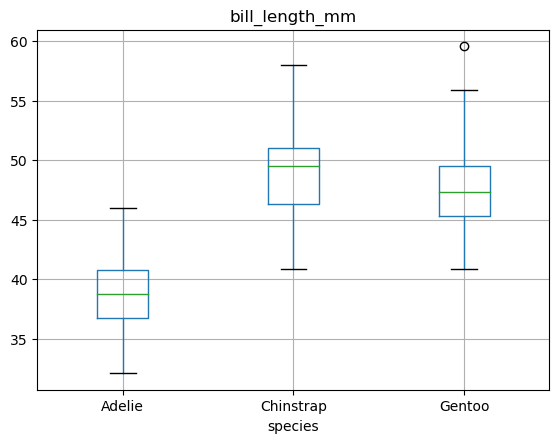

In [21]:
import matplotlib.pyplot as plt
boxplots = data_penguins.boxplot(column='bill_length_mm',by='species', fontsize=10)
plt.suptitle("")
plt.show()

In [22]:
df1 = data_penguins['species'] == 'Adelie'
#print(data_penguins['species'].value_counts())

In [23]:
data_penguins[df1]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
...,...,...,...,...,...,...,...
147,Adelie,Dream,36.6,18.4,184.0,3475.0,female
148,Adelie,Dream,36.0,17.8,195.0,3450.0,female
149,Adelie,Dream,37.8,18.1,193.0,3750.0,male
150,Adelie,Dream,36.0,17.1,187.0,3700.0,female


In [24]:
new_dataframe = data_penguins[df1]

In [25]:
new_dataframe['bill_length_mm'].mean()

38.79139072847682

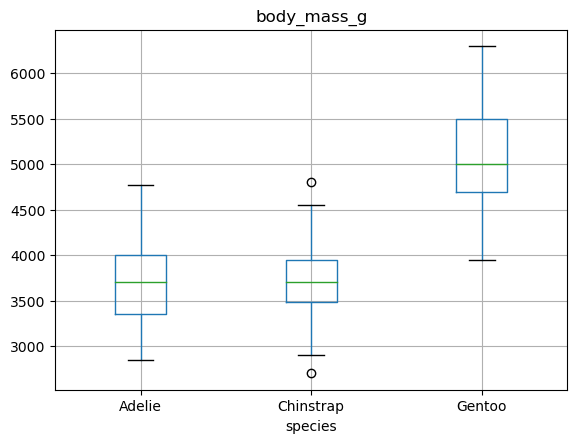

In [26]:
boxplots = data_penguins.boxplot(column='body_mass_g',by='species', fontsize=10)
plt.suptitle("")
plt.show()

## Performing t-tests after boxplots

In [27]:
from scipy.stats import ttest_ind
group0 = data_penguins['species'] == 'Adelie'
group1 = data_penguins['species'] == 'Chinstrap'
group2 = data_penguins['species'] == 'Gentoo'
variable = data_penguins['bill_length_mm']
print('var1 %0.3f var2 %03f' % (variable[group1].var(),variable[group2].var()))

var1 11.151 var2 9.497845


In [28]:
variable = data_penguins['bill_length_mm']
t, pvalue = ttest_ind(variable[group1], variable[group2],axis=0, equal_var=False)
print('t statistic %0.3f p-value %0.3f' % (t, pvalue))

t statistic nan p-value nan


In [29]:
from scipy.stats import f_oneway
#variable = data_penguins['bill_length_mm']
f, pvalue2 = f_oneway(variable[group0],variable[group1],variable[group2])
print('One-way ANOVA F-value %0.3f p-value %0.3f'% (f,pvalue))

One-way ANOVA F-value nan p-value nan


## Graphing distributions
### Feature's distributions and densities

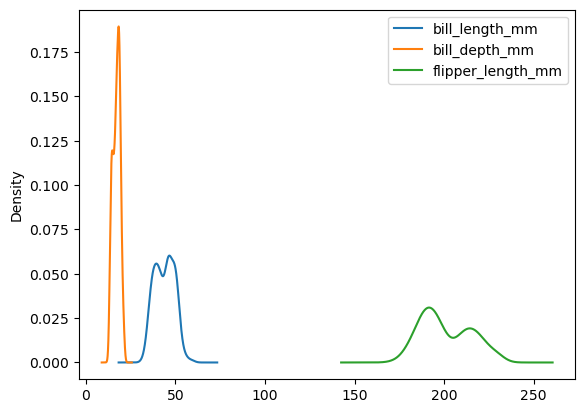

In [30]:
cols = data_penguins.columns[2:5]
densityplot = data_penguins[cols].plot(kind='density')

### Histrograms

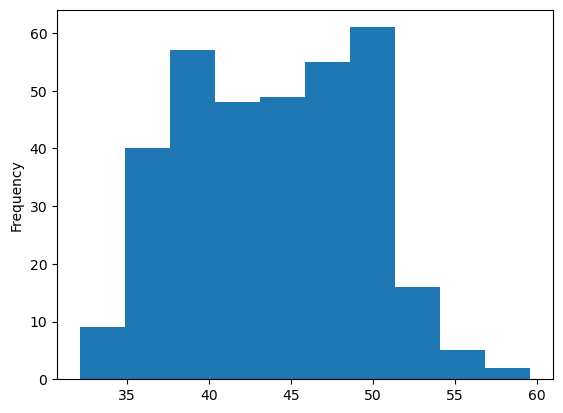

In [31]:
variable = data_penguins['bill_length_mm']
single_distribution = variable.plot(kind='hist')

### Scatterplots

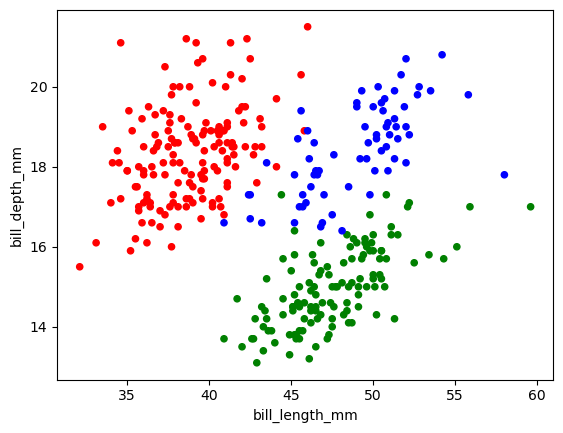

In [32]:
palette = {'Adelie': 'red', 'Gentoo': 'green', 'Chinstrap':'blue'}
colors = [palette[c] for c in data_penguins['species']]
simple_scatterplot = data_penguins.plot(kind='scatter', x='bill_length_mm',y='bill_depth_mm', c=colors)

In [33]:
data_penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

### Data cleaning

In [34]:
data_penguins['bill_length_mm'] = data_penguins['bill_length_mm'].fillna(1)
data_penguins['bill_depth_mm'] = data_penguins['bill_depth_mm'].fillna(1)
data_penguins['flipper_length_mm'] = data_penguins['flipper_length_mm'].fillna(1)
data_penguins['body_mass_g'] = data_penguins['body_mass_g'].fillna(1)

In [35]:
data_penguins.isnull().sum()

species               0
island                0
bill_length_mm        0
bill_depth_mm         0
flipper_length_mm     0
body_mass_g           0
sex                  11
dtype: int64

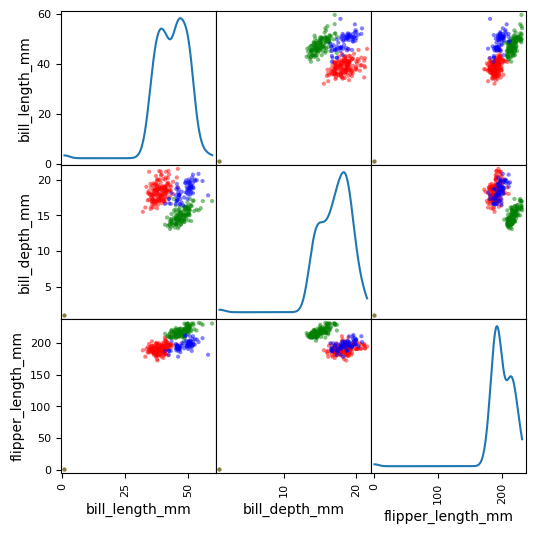

In [36]:
from pandas.plotting import scatter_matrix
palette = {'Adelie':'red', 'Gentoo':'green', 'Chinstrap':'blue'}
colors = [palette[c] for c in data_penguins['species']]
matrix_of_scatterplots = scatter_matrix(data_penguins[cols], figsize=(6, 6), color=colors, diagonal='kde')

# Understanding Correlation
## Using covariance and correlation

In [37]:
data_penguins.cov()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,40.313025,1.499254,99.824643,3635.624630
bill_depth_mm,1.499254,5.389276,2.599323,-349.702415
flipper_length_mm,99.824643,2.599323,428.262382,14635.423232
body_mass_g,3635.624630,-349.702415,14635.423232,741676.916096


In [38]:
data_penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,0.101716,0.759731,0.664889
bill_depth_mm,0.101716,1.000000,0.054105,-0.174915
flipper_length_mm,0.759731,0.054105,1.000000,0.821189
body_mass_g,0.664889,-0.174915,0.821189,1.000000


## Using nonparametric correlation

In [39]:
from scipy.stats import spearmanr
from scipy.stats.stats import pearsonr
a = data_penguins['bill_length_mm']
b = data_penguins['bill_depth_mm']
rho_coef, rho_p = spearmanr(a, b)
r_coef, r_p = pearsonr(a, b)
print('Pearson r %0.3f | Spearman rho %0.3f'% (r_coef, rho_coef))

Pearson r 0.102 | Spearman rho -0.201


## Chisquare tests for tables

In [40]:
from scipy.stats import chi2_contingency
table = pd.crosstab(data_penguins['species'],penguins_binned['bill_length_mm'])
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square %0.2f p-value %0.3f' % (chi2, p))

Chi-square 274.63 p-value 0.000


# Modifying data distribution
## Creating a Z-score stadardization

In [41]:
from sklearn.preprocessing import scale
variable = data_penguins['bill_length_mm']
stand_sepal_width = scale(variable)

In [42]:
from scipy.stats.stats import pearsonr
tranformations = {'x': lambda x: x,'1/x': lambda x: 1/x,'x**2': lambda x: x**2,'x**3': lambda x: x**3,'log(x)': lambda x: np.log(x)}
a = data_penguins['bill_length_mm']
b = data_penguins['bill_depth_mm']
for transformation in tranformations:
    b_transformed = tranformations[transformation](b)
    pearsonr_coef, pearsonr_p = pearsonr(a, b_transformed)
    print('Transformation: %s \t Pearson\'s r: %0.3f'% (transformation, pearsonr_coef))

Transformation: x 	 Pearson's r: 0.102
Transformation: 1/x 	 Pearson's r: -0.492
Transformation: x**2 	 Pearson's r: -0.021
Transformation: x**3 	 Pearson's r: -0.068
Transformation: log(x) 	 Pearson's r: 0.354


In [43]:
from sklearn.datasets import load_iris
from sklearn.decomposition import FactorAnalysis
iris = load_iris()
X = iris.data
Y = iris.target
iris_cols = [s[:12].strip() for s in iris.feature_names]
factor = FactorAnalysis(n_components=4).fit(X)

In [44]:
X.shape

(150, 4)

In [45]:
arr_data = data_penguins[cols].to_numpy()

In [46]:
arr_data.shape

(344, 3)

In [47]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [48]:
Y.shape

(150,)

In [49]:
labels = {'Adelie':0,'Gentoo':1,'Chinstrap':2}
coded_labels = [labels[x] for x in list(data_penguins['species'])]
arr_target = np.array(coded_labels)

In [50]:
arr_target.shape

(344,)

In [51]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [52]:
data_col_names = list(data_penguins.columns)
data_feature_names = data_col_names[2:5]

In [53]:
Xdp = arr_data
Ydp = arr_target
penguins_cols = [s[:12].strip() for s in data_feature_names]
factor = FactorAnalysis(n_components=4).fit(Xdp)

In [54]:
print(pd.DataFrame(factor.components_, columns=penguins_cols))

   bill_length_  bill_depth_m  flipper_leng
0     -4.994757     -0.136636    -20.619860
1      3.771301      0.302889     -0.915531
2      0.159756     -2.064751     -0.025016


## Dimensionality reduction with PCA

In [55]:
from sklearn.decomposition import PCA
pca = PCA().fit(Xdp)

In [56]:
print('Explained variance by each component: %s'% pca.explained_variance_ratio_)
print(pd.DataFrame(pca.components_,columns=data_feature_names))

Explained variance by each component: [0.95462845 0.03417922 0.01119233]
   bill_length_mm  bill_depth_mm  flipper_length_mm
0       -0.235417      -0.006440          -0.971873
1        0.968828       0.077811          -0.235195
2        0.077137      -0.996947          -0.012079
